# Lab 1 - Machine Learning

## Import libraries and other tools we need

In [81]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
%matplotlib inline
import wget

## Obtaining the data

In [82]:
fname= wget.download('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv')

## First look at the data

In [83]:
df = pd.read_csv(fname)

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Chosen hyperparametes

We choose these hyperparameters ENGINESIZE, CYLINDERS and FUELCONSUMPTION_COMB:

- ENGINESIZE (L): Total displacement of all cylinders (in litres) 
- CYLINDERS: Number of engine cylinders
- FUELCONSUMPTION_COMB: Combined fuel consumption rating shown in litres per 100 kilometres (L/100km) 
- CO2EMISSIONS: The vehicle's tailpipe emissions of carbon dioxide shown in grams per kilometre for combined city and highway driving (g/km)

## Hyperparameters data and relationship with CO2 Emissions

In [84]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

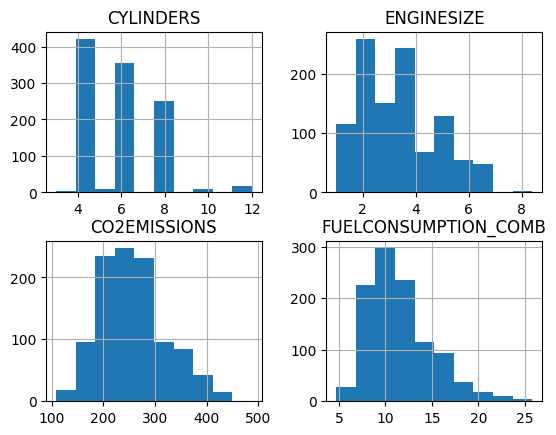

In [85]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

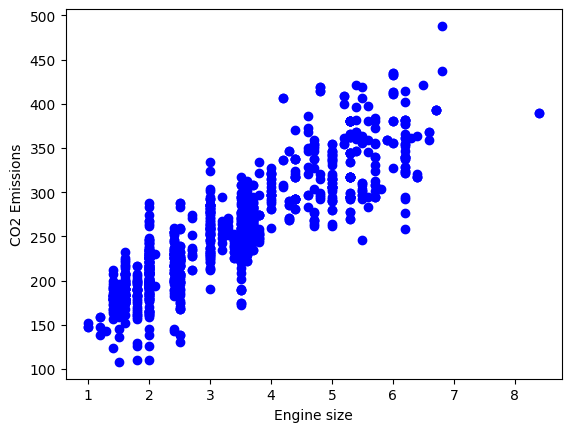

In [86]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("CO2 Emissions")
plt.show()

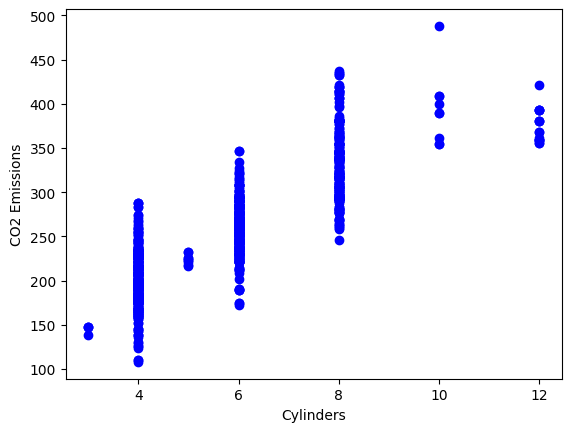

In [87]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinders")
plt.ylabel("CO2 Emissions")
plt.show()

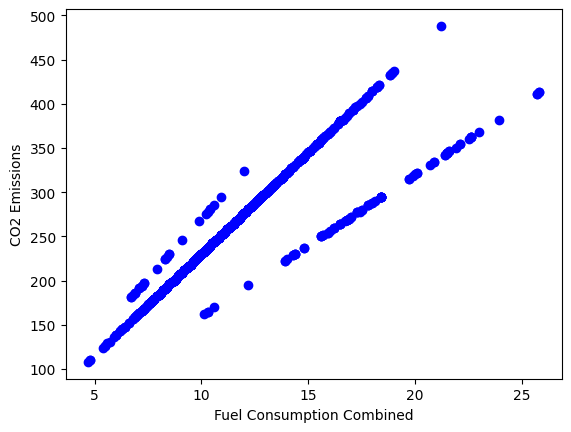

In [88]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Fuel Consumption Combined")
plt.ylabel("CO2 Emissions")
plt.show()

## Before Modeling 

In [89]:
x = df.loc[:,['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
y = df.loc[:,['CO2EMISSIONS']]

degree_model = 2

p = sk.preprocessing.PolynomialFeatures(degree_model).fit(x)
feature_names = p.get_feature_names_out(x.columns)

print(p.get_feature_names_out(x.columns))

x = sk.preprocessing.PolynomialFeatures(degree_model).fit_transform(x)

['1' 'ENGINESIZE' 'CYLINDERS' 'FUELCONSUMPTION_COMB' 'ENGINESIZE^2'
 'ENGINESIZE CYLINDERS' 'ENGINESIZE FUELCONSUMPTION_COMB' 'CYLINDERS^2'
 'CYLINDERS FUELCONSUMPTION_COMB' 'FUELCONSUMPTION_COMB^2']


In [90]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## Modeling

### Model 1: Using Linear Regression function from Scikit Learns

In [91]:
model_1 = LinearRegression().fit(x_train, y_train)

In [92]:
y_model_train = model_1.predict(x_train)
y_model_test = model_1.predict(x_test)

print("Linear Regression:")
print("Test MSE:",sk.metrics.mean_squared_error(y_test, y_model_test))
print("Test Mean Absolute Error:",sk.metrics.mean_absolute_error(y_test, y_model_test))
print("Test R2:",sk.metrics.r2_score(y_test, y_model_test))

Linear Regression:
Test MSE: 392.4693515145945
Test Mean Absolute Error: 11.73170076126159
Test R2: 0.9020593727107403


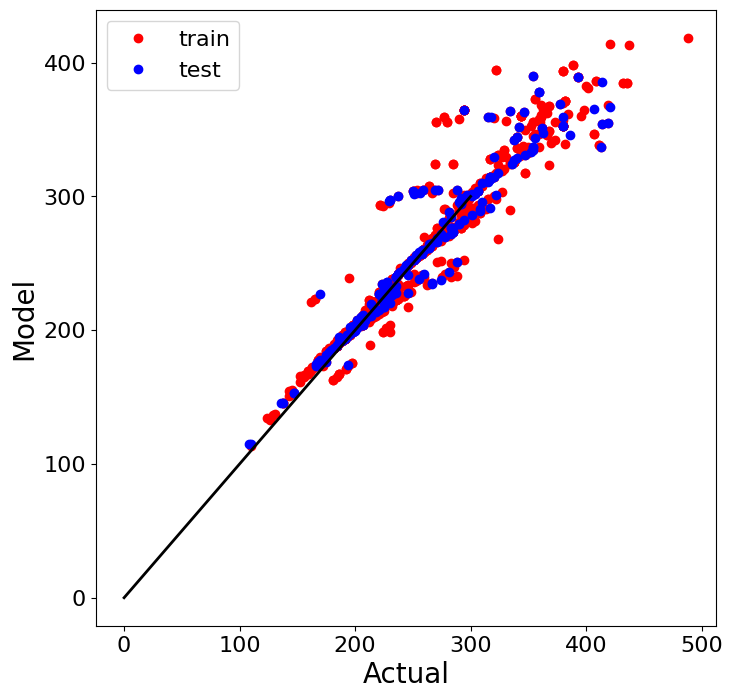

In [93]:
plt.plot(y_train, y_model_train, 'ro')
plt.plot(y_test, y_model_test, 'bo')

plt.plot([0,300],[0,300],'k',linewidth=2)
plt.xlabel('Actual',fontsize=20)
plt.ylabel('Model',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(['train','test'],fontsize=16)
fig = plt.gcf()
fig.set_size_inches(8,8)

(1, 10)


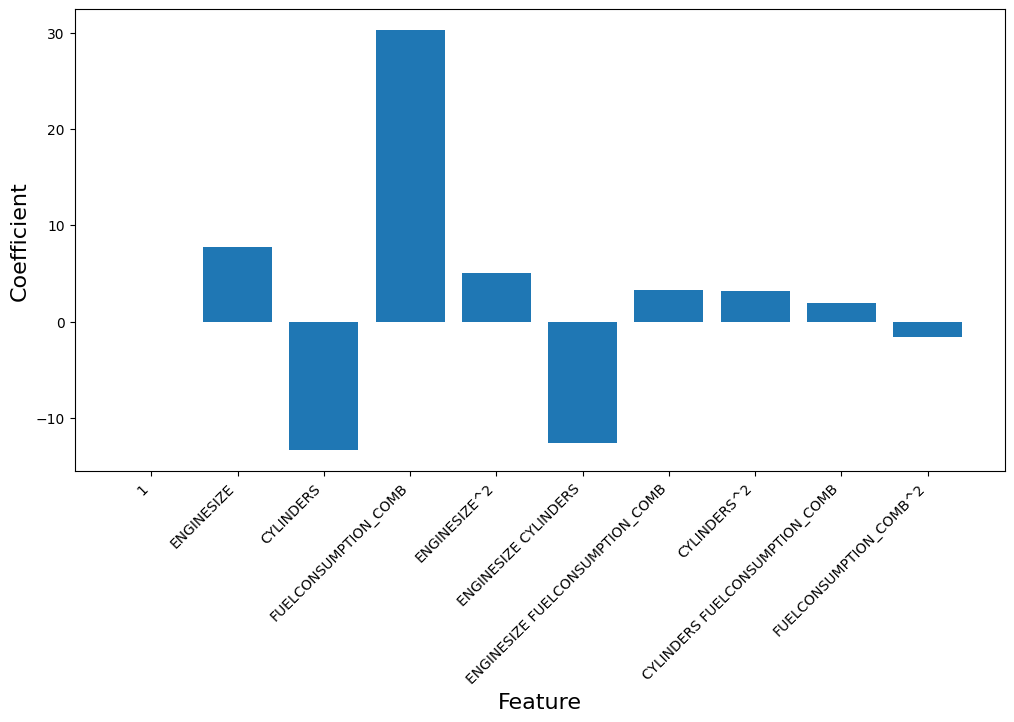

In [94]:
print(model_1.coef_.shape)

coefficients = model_1.coef_.flatten()

plt.figure(figsize=(12, 6))
plt.bar(feature_names, coefficients)
plt.ylabel('Coefficient', fontsize=16)
plt.xlabel('Feature', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.show()

### Model 2: Using Ridge function from Scikit Learns (L2 regularization)

In [95]:
ridge_model = Ridge(alpha=1.0).fit(x_train, y_train)
ridge_pred_train = ridge_model.predict(x_train)
ridge_pred_test = ridge_model.predict(x_test)

In [96]:
print("Ridge Regression:")
print("Test MSE:", sk.metrics.mean_squared_error(y_test, ridge_pred_test))
print("Test Mean Absolute Error:", sk.metrics.mean_absolute_error(y_test, ridge_pred_test))
print("Test R2:", sk.metrics.r2_score(y_test, ridge_pred_test))

Ridge Regression:
Test MSE: 391.47566818271565
Test Mean Absolute Error: 11.727625125819017
Test R2: 0.90230734613459


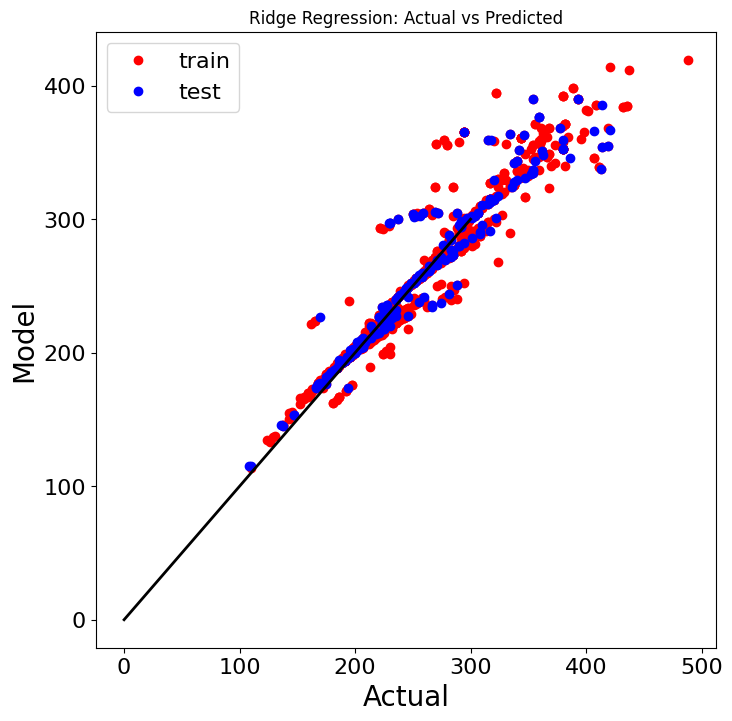

In [97]:
plt.plot(y_train, ridge_pred_train, 'ro')
plt.plot(y_test, ridge_pred_test, 'bo')

plt.plot([0, 300], [0, 300], 'k', linewidth=2)
plt.xlabel('Actual', fontsize=20)
plt.ylabel('Model', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(['train', 'test'], fontsize=16)
fig = plt.gcf()
fig.set_size_inches(8, 8)
plt.title('Ridge Regression: Actual vs Predicted')
plt.show()


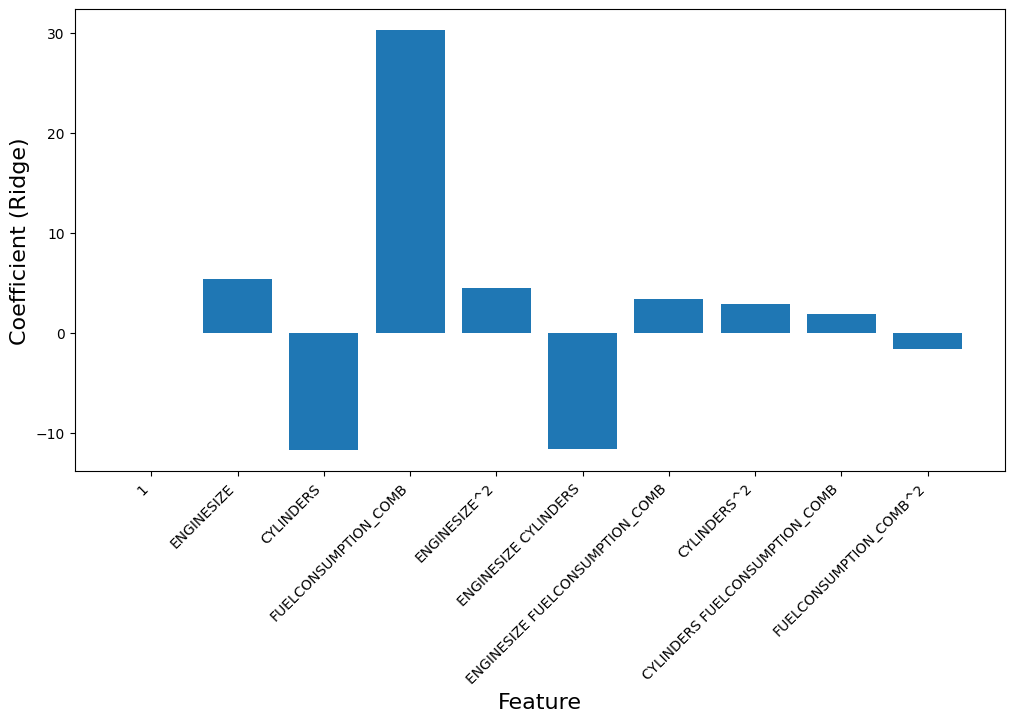

In [98]:
ridge_coefficients = ridge_model.coef_.flatten()
plt.figure(figsize=(12, 6))
plt.bar(feature_names, ridge_coefficients)
plt.ylabel('Coefficient (Ridge)', fontsize=16)
plt.xlabel('Feature', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.show()

### Model 3: Using Lasso function from Scikit Learns (L1 regularization)

In [99]:
lasso_model = Lasso(alpha=1.0, max_iter=10000).fit(x_train, y_train)
lasso_pred_train = lasso_model.predict(x_train)
lasso_pred_test = lasso_model.predict(x_test)

In [100]:
print("Lasso Regression:")
print("Test MSE:", sk.metrics.mean_squared_error(y_test, lasso_pred_test))
print("Test Mean Absolute Error:", sk.metrics.mean_absolute_error(y_test, lasso_pred_test))
print("Test R2:", sk.metrics.r2_score(y_test, lasso_pred_test))

Lasso Regression:
Test MSE: 414.99471815613373
Test Mean Absolute Error: 13.232039410454176
Test R2: 0.8964381731692244


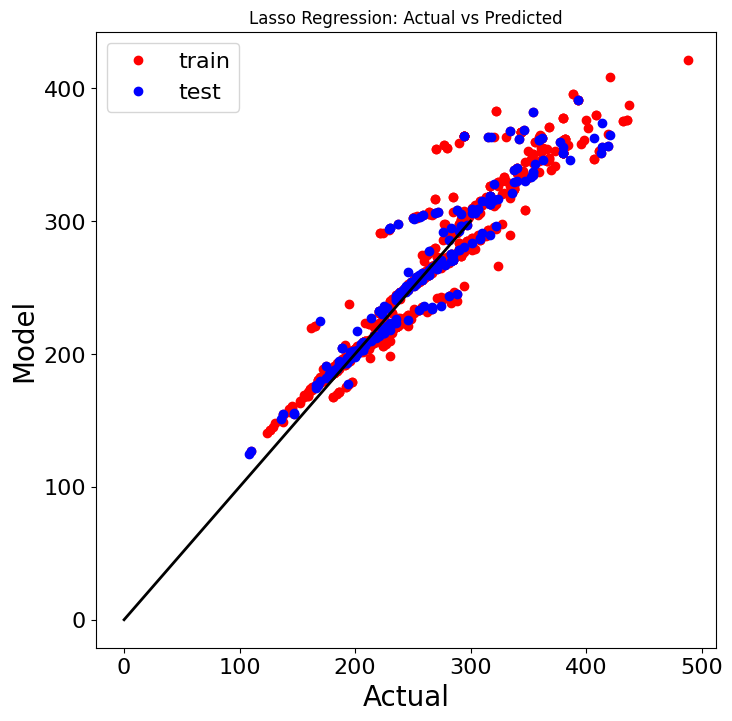

In [101]:
plt.plot(y_train, lasso_pred_train, 'ro')
plt.plot(y_test, lasso_pred_test, 'bo')

plt.plot([0, 300], [0, 300], 'k', linewidth=2)
plt.xlabel('Actual', fontsize=20)
plt.ylabel('Model', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(['train', 'test'], fontsize=16)
fig = plt.gcf()
fig.set_size_inches(8, 8)
plt.title('Lasso Regression: Actual vs Predicted')
plt.show()

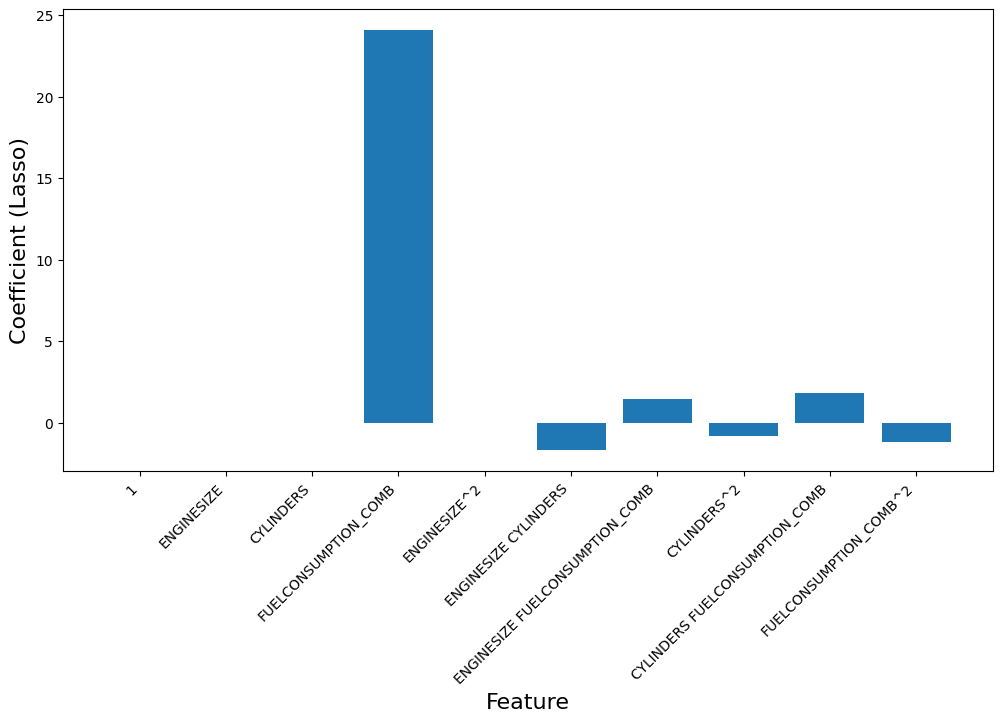

In [102]:
lasso_coefficients = lasso_model.coef_.flatten()
plt.figure(figsize=(12, 6))
plt.bar(feature_names, lasso_coefficients)
plt.ylabel('Coefficient (Lasso)', fontsize=16)
plt.xlabel('Feature', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.show()

### Model 4: Using Elastic Net function from Scikit Learns (L1 and L2 combined regularization)

In [103]:
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5, max_iter=10000).fit(x_train, y_train)
elastic_net_pred_train = elastic_net_model.predict(x_train)
elastic_net_pred_test = elastic_net_model.predict(x_test)

In [104]:
print("Elastic Net Regression:")
print("Test MSE:", sk.metrics.mean_squared_error(y_test, elastic_net_pred_test))
print("Test Mean Absolute Error:", sk.metrics.mean_absolute_error(y_test, elastic_net_pred_test))
print("Test R2:", sk.metrics.r2_score(y_test, elastic_net_pred_test))

Elastic Net Regression:
Test MSE: 482.624822933312
Test Mean Absolute Error: 15.812982708672338
Test R2: 0.879561097647395


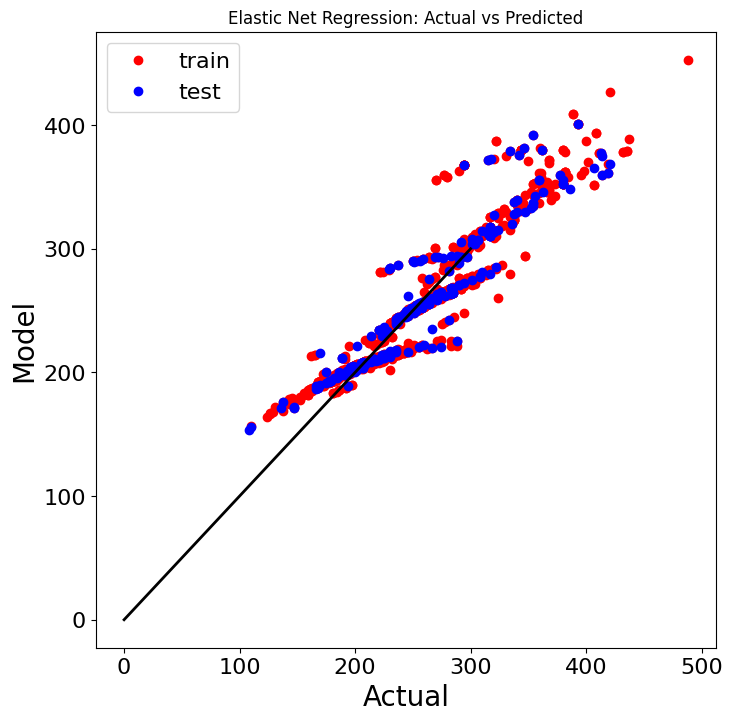

In [105]:
plt.plot(y_train, elastic_net_pred_train, 'ro')
plt.plot(y_test, elastic_net_pred_test, 'bo')

plt.plot([0, 300], [0, 300], 'k', linewidth=2)
plt.xlabel('Actual', fontsize=20)
plt.ylabel('Model', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(['train', 'test'], fontsize=16)
fig = plt.gcf()
fig.set_size_inches(8, 8)
plt.title('Elastic Net Regression: Actual vs Predicted')
plt.show()

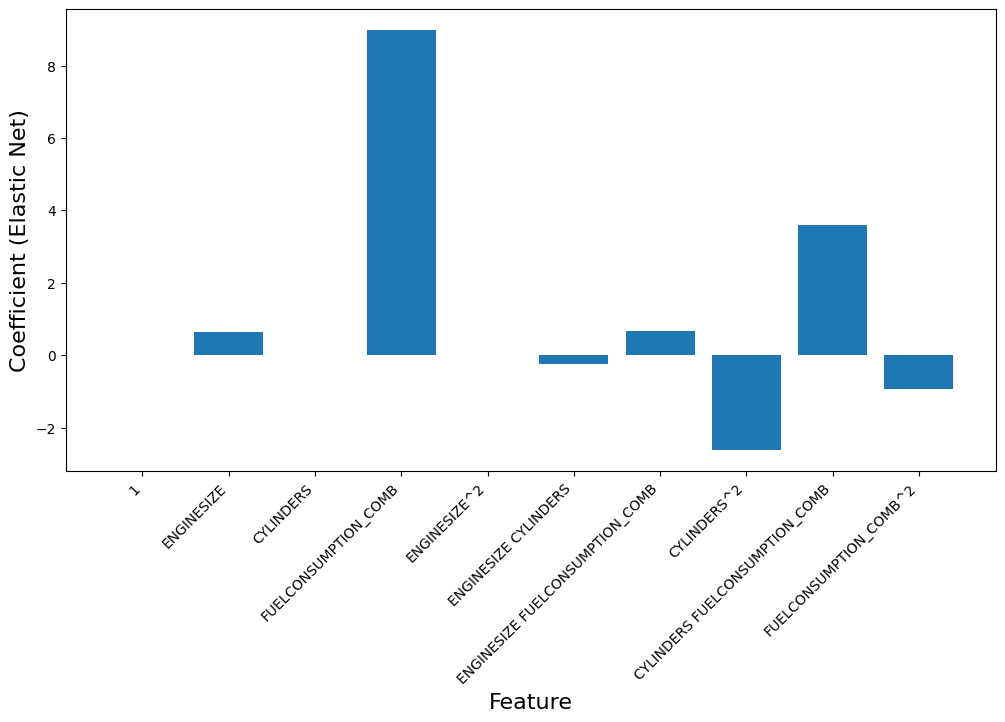

In [106]:
elastic_net_coefficients = elastic_net_model.coef_.flatten()
plt.figure(figsize=(12, 6))
plt.bar(feature_names, elastic_net_coefficients)
plt.ylabel('Coefficient (Elastic Net)', fontsize=16)
plt.xlabel('Feature', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.show()